In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [6]:
data = pd.read_csv('train.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
len(data)

891

Data Dictionary

..  Variable	Definition	    Key
1.  survival:	Survival	    (0 = No, 1 = Yes)
2.  pclass	:    Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
3.  sex	    :    Sex	
4.  Age	    :    Age in years	
5.  sibsp	:    # of siblings / spouses aboard the Titanic	
6.  parch	:    # of parents / children aboard the Titanic	
7.  ticket  :	Ticket number	
8.  fare	:    Passenger fare	
9.  cabin	:    Cabin number	
10. embarked:	Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)



In [11]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [14]:
data['Age'].min(), data['Age'].max()

(0.42, 80.0)

In [15]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
data['Survived'].value_counts()*100/len(data)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [19]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

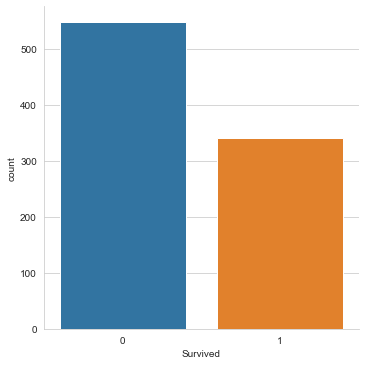

In [24]:
sns.catplot(x= 'Survived', data = data, kind = 'count')

<AxesSubplot:xlabel='Sex', ylabel='Count'>

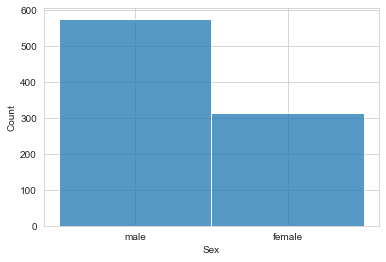

In [34]:
sns.histplot(data['Sex'], bins = None)

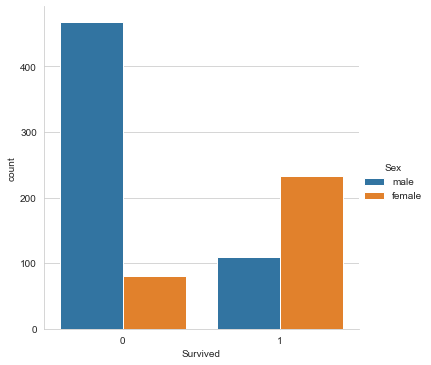

In [35]:
sns.catplot(x= 'Survived', data = data, kind = 'count', hue = 'Sex')


<AxesSubplot:xlabel='Survived', ylabel='Age'>

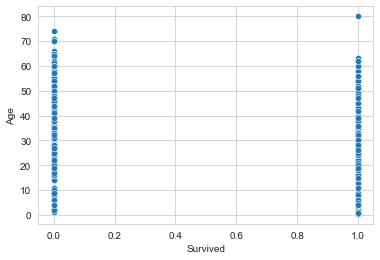

In [38]:
sns.scatterplot(x='Survived', y = 'Age', data = data)

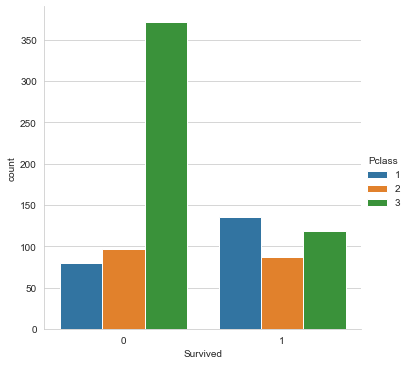

In [57]:
sns.catplot(x='Survived', data = data, kind ='count',  hue = 'Pclass')

In [60]:
def male_female_child(passenger):
    age,sex =passenger
    if age <16:
        return 'child'
    else:
        return sex

In [61]:
data['Person'] = data[['Age','Sex']].apply(male_female_child, axis = 1)

In [62]:
data.loc[100:105]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S,female
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,male
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S,male
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S,male
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S,male
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S,male


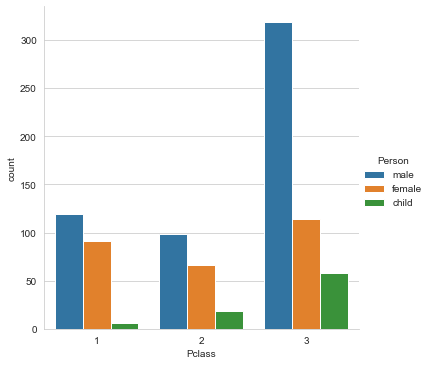

In [63]:
sns.catplot(x ='Pclass', data = data, kind = 'count', hue = 'Person')

In [68]:
data.value_counts(data['Age'].isnull() == True)

Age
False    714
True     177
dtype: int64

In [105]:
data['Alone'] = data.SibSp + data.Parch

In [106]:
data['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [107]:
data['Alone'].loc[data['Alone']>0] = 'With Family'
data['Alone'].loc[data['Alone']==0] = 'Alone'

C:\Users\Ishwer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [108]:
data.loc[50:55]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,IsFemale
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,child,With Family,False
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S,male,Alone,False
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,female,With Family,True
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S,female,With Family,True
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,male,With Family,False
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,male,Alone,False


### Using just one feature

In [73]:
data['IsFemale'] =(data['Sex'] == 'female')

samples = data[['IsFemale']] #x
labels = data['Survived'] #y

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(samples, labels, train_size = 0.7, random_state =0)

In [75]:
X_train['IsFemale'].value_counts()

False    408
True     215
Name: IsFemale, dtype: int64

### Dummy Classifier (most frequent class)

In [76]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy = 'most_frequent')
clf_dummy.fit(X_train, Y_train)

y_predicted = clf_dummy.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score

print('Accuracy = {}'.format(accuracy_score(Y_test, y_predicted)))

Accuracy = 0.6268656716417911


### Random forest classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, Y_train)

y_predicted = clf.predict(X_test)

print('Accuracy = {}'.format(accuracy_score(Y_test, y_predicted)))

Accuracy = 0.7873134328358209


### Using more features

In [97]:
samples = data[['IsFemale', 'Pclass']] #x
labels = data['Survived'] #y

X_train, X_test, Y_train, Y_test = train_test_split(samples, labels, train_size = 0.7, random_state = 0)


In [98]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, Y_train)

y_predicted = clf.predict(X_test)

print('Accuracy = {}'.format(accuracy_score(Y_test, y_predicted)))

Accuracy = 0.7873134328358209


In [109]:
data['IsAlone'] = (data['Alone']== 'Alone')

In [110]:
data['IsChild'] = (data['Person'] == 'child')

In [111]:

features = ['IsFemale', 'IsAlone', 'Pclass','IsChild', 'Fare']
samples = data[features] #x
labels = data['Survived'] #y

X_train, X_test, Y_train, Y_test = train_test_split(samples, labels, train_size = 0.7, random_state = 0)

In [112]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, Y_train)

y_predicted = clf.predict(X_test)

print('Accuracy = {}'.format(accuracy_score(Y_test, y_predicted)))

Accuracy = 0.8097014925373134


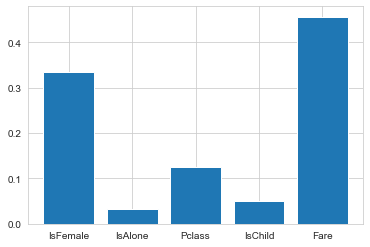

In [115]:
plt.bar(range(len(features)),clf.feature_importances_,tick_label = features)
plt.show()

In [116]:
data['AgeSentinel'] = data['Age'].fillna(-100)

In [117]:
features = ['IsFemale', 'IsAlone', 'Pclass','IsChild', 'Fare', 'AgeSentinel']
samples = data[features] #x
labels = data['Survived'] #y

X_train, X_test, Y_train, Y_test = train_test_split(samples, labels, train_size = 0.7, random_state = 0)

In [118]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, Y_train)

y_predicted = clf.predict(X_test)

print('Accuracy = {}'.format(accuracy_score(Y_test, y_predicted)))

Accuracy = 0.8097014925373134


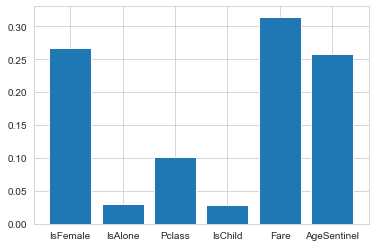

In [119]:
plt.bar(range(len(features)),clf.feature_importances_,tick_label = features)
plt.show()

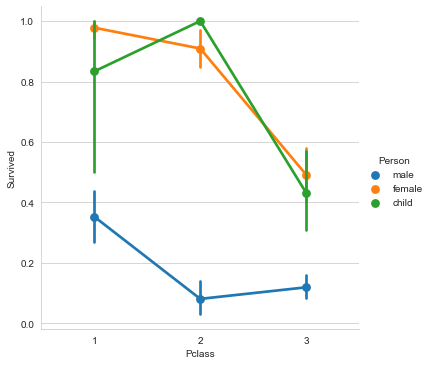

In [122]:
sns.catplot(x='Pclass', y='Survived', hue ='Person', data=data, kind = 'point')

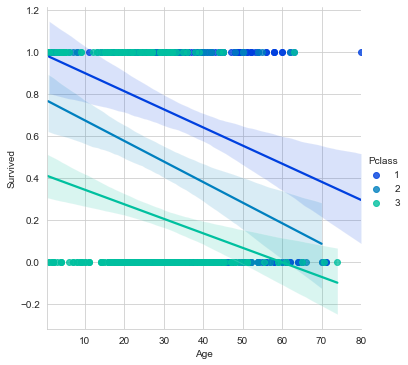

In [125]:
sns.lmplot(x='Age',y='Survived',hue = 'Pclass', data=data, palette ='winter')